# Интернет магазин "стримчик"

Цель выполнения аналитической работы: планирования рекламной кампании и реализации на следующий год

Описание проекта: представлены данные о видео играх за предыдущие года: платформа игры, продажи по регионам, оценки критиков и игроков и так далее. Нужно найти инсайты, которые помогут бизнесу удачно спланировать продажи на следующий год.

Цель исследования: проверить предложенные гипотезы и сделать выводы по ним

Ход выполнения работы:
1) Открытие файла с данными

2) Подготовка данных
* работа с пропусками
* замена на заголовков на нижний регистр
* проверить данные на дубликаты
* изменить типы данных где требуется

3) Провести исследовательский анализ данных
* анализ выпуска игр за период
* выбор наиболее акуальных платформ
* оценить влияние оценок игровых критиков и игроков на продажи игр

4) Составить портрет пользователя
* Выявление приорететных платформ для регионов
* Выявление приорететных жанров для регионов
* Оценка влияния рейтинга ESRB на продажи в регионах

5) Проверка гипотез

6) Общий вывод

#### Откройте файл с данными и изучите общую информацию

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [141]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Отметим неполноту данных в датафрейме, больше всего пропусков в столбцах user_score, critic_score, rating. Пропуски могут исказить выводы по данным, однако заполнить данные синтетически не получится

Также видим, что заголовки не соответсвуют змеиному регистру и некоторые столбцы имеют некорректный тип данных.

#### Подготовьте данные

##### Замените названия столбцов (приведите к нижнему регистру)

In [143]:
data.columns = map(str.lower, data.columns)
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

##### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

* Преобразуем столбец year_of_release в тип данных int, потому что года целочисленные величины

* Преобразуем столбец critic_score в тип данных int, потому что оценки игровых критиков целочисленные величины

* Преобразуем столбец user_score в тип данных float64, потому что у оценок пользователей есть дробная часть

меняем значение на Int64 так как в столбце присутствуют nan значения

In [144]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

абревиатура tbd означает, что рейтинг игры обсуждается, заменим это значение на nan

In [145]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = pd.to_numeric(data['user_score'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [146]:
data['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

проверили данные на наличие явных дубликатов

In [147]:
data.duplicated().sum()

0

проверим данные на неявные дубликаты

In [148]:
data[['name', 'year_of_release', 'platform']].duplicated().sum()

2

In [149]:
data = data.drop_duplicates(subset=['name', 'year_of_release', 'platform'])

In [150]:
data[['name', 'year_of_release', 'platform']].duplicated().sum()

0

Удалили неявные дубликаты

##### Обработайте пропуски при необходимости

пропуски присутствуют в столбцах name, year_of_release, genre, critic_score, user_score, rating

заполнить их медианой, средним или модой нельзя, так как исказятся данные

Причины пропусков могут быть разные например: технического плана, система при загрузке данных пропустила какие то значения, также отсутвие данных как в случае с пропущенными значениями оценок, может свидетельствовать о отсутсвии оценок у прессы либо игроков

##### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [151]:
data['total_sales'] = data.loc[:,['na_sales','eu_sales','jp_sales']].sum(axis=1)

В этапе предобработки данных мы изменили типы данных у столбцов year_of_release и user_score. Обработали явные и неявные пропуски. Привели столбцы к змеиному регистру

#### Проведите исследовательский анализ данных

##### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

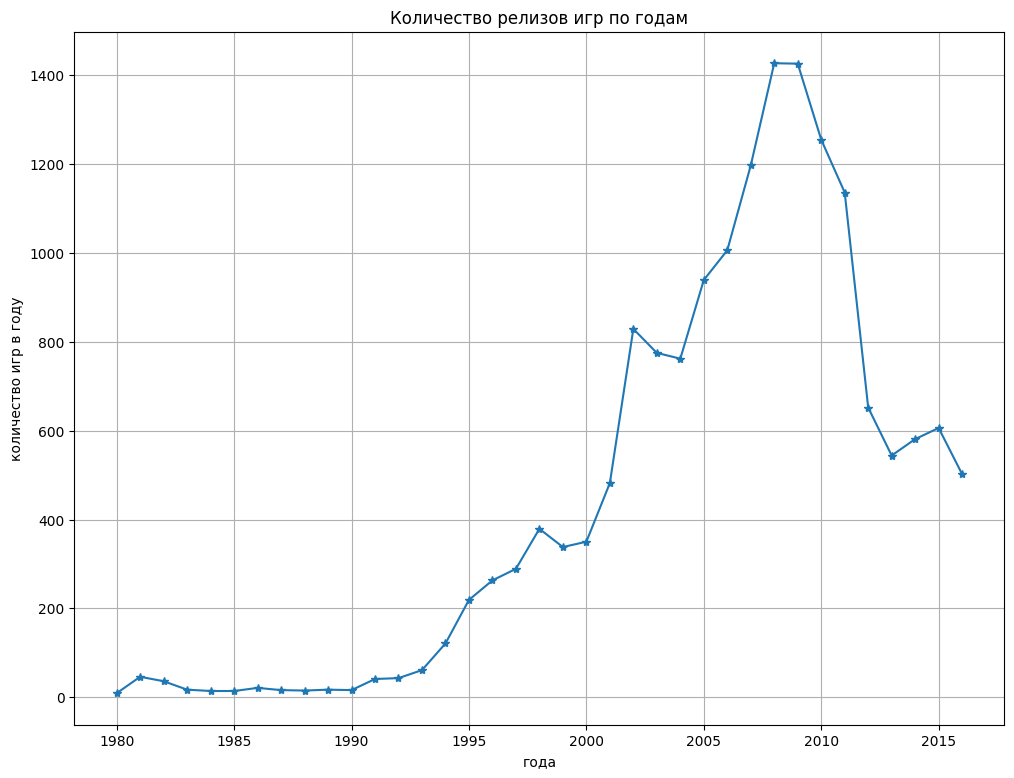

In [152]:
plt.figure(figsize=(12,9))
data.year_of_release.value_counts().sort_index().plot(marker='*', grid=True)
plt.xlabel('года')
plt.ylabel('количество игр в году')
plt.title('Количество релизов игр по годам')
plt.show()

Из графика видно, что до 1994 года выпуск видео игр был в стагнации, меньше 100 игр в год, затем начался подъем, который продлился до 2009 года, в это время выпускалось более 1400 игр в год, после этого следует сильное снижение, которое также продолжается в 2016 году. Выпуск игр вернулся на значения 2001 года примерно 500 игр в год

При анализе не так важны данные за 1980-1994 года, в то время игровая индустрия еще не была так развита.

##### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [153]:
# сгрупируем 10 самых самых по наибольшей выручке среди платформ
top_10_platforms = data.groupby(['platform']).total_sales.sum().sort_values(ascending=False).head(10)
display(top_10_platforms)

platform
PS2     1062.33
X360     885.66
Wii      828.44
PS3      803.96
DS       746.86
PS       689.95
GBA      310.12
PS4      265.79
PSP      252.63
XB       249.02
Name: total_sales, dtype: float64

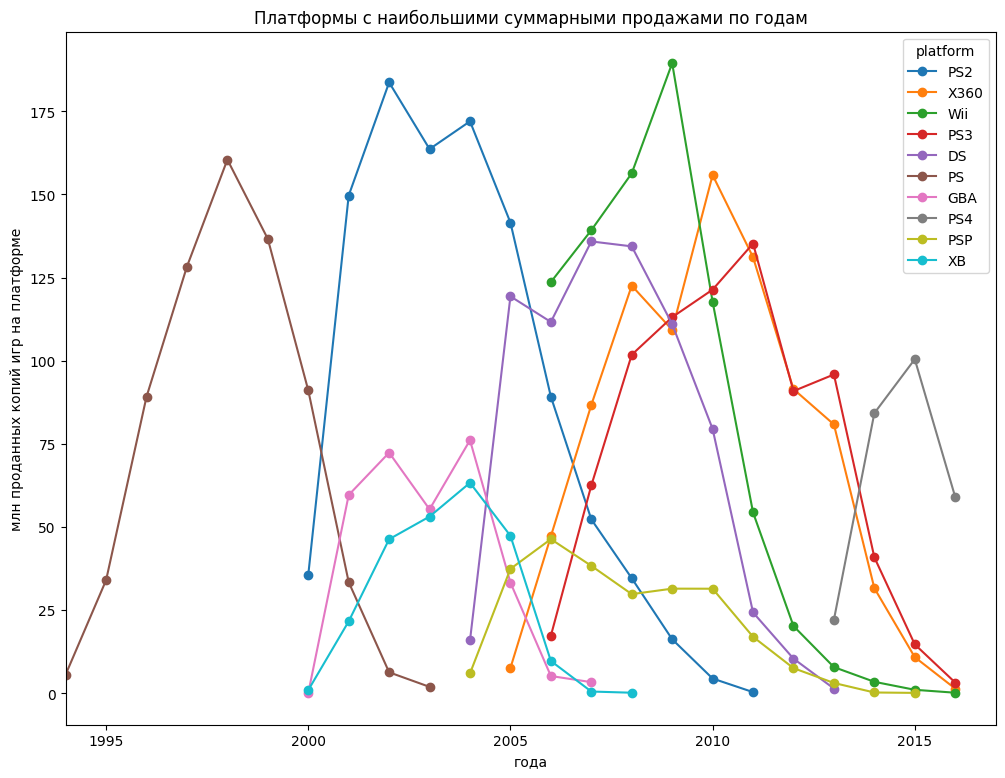

In [154]:
values=(
        data.groupby(['year_of_release','platform'])
        .total_sales.sum().reset_index()
        .pivot_table(index='year_of_release',columns='platform',values='total_sales')
    )

values_top_10 = values.loc[:,top_10_platforms.index]
values_top_10.plot(figsize=(12,9), marker='o')
plt.xlim(1994,2017)
plt.ylabel('млн проданных копий игр на платформе')
plt.title('Платформы с наибольшими суммарными продажами по годам')
plt.xlabel('года')
plt.show()

На графике видим что у платформ существуют оперделенные циклы, рост продаж игр на платформах в течение цикла, а затем затухание и отсутвие дальнейшего выпуска игр на данных платформах

In [155]:
data.groupby('platform')['year_of_release'].nunique().mean()

7.67741935483871

Жизненый цикл платформы в среднем примерно 7,5 лет

In [156]:
# код ревьюера
data.groupby('platform')['year_of_release'].nunique().mean()

7.67741935483871

##### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год

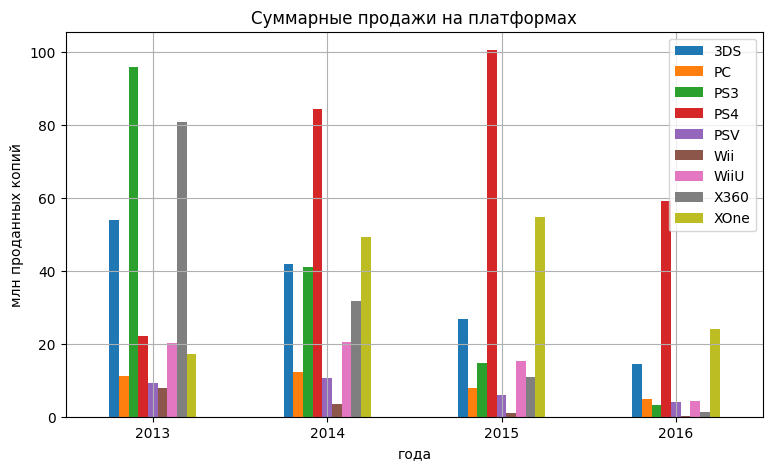

In [157]:
period_values = values.loc[values.index >= 2013].dropna(axis=1)
period_values.plot(kind='bar', rot=0, figsize=(9,5), grid=True)
plt.title('Суммарные продажи на платформах')
plt.xlabel('года')
plt.ylabel('млн проданных копий')
plt.legend(loc='upper right')
plt.show()

Возьмем за актуальный период 2013-2016 года, так как в 2013 году вышли такие консоли как playstation 4 и xbox one, которые являются новыми версиями наиболее популярных консолей прошлого поколения.

Из анализа данных за 4 года видно, что поменялись лидеры по совокупным релизам игр среди платформ. В 2013 году наиболее популярными консолями были xbox 360 и playstation 3, в 2014 году уже вышли их более новые версии. Доля платформ Wii, Wiiu, Psv и pc незначительна. Наиболее популярными платформами на 2016 год стали playstation 4 и xbox one, на третьем месте 3ds, однако видно что его продажи пада.т с каждым годом.

Так как цикл новых консолей только начался, разработаем стратегию на 2017 год. Мы знаем, что цикл платформ примерно 8-9 лет, то есть платформы находятся только в начале своего цикла и выхода их новых версий не планируется, поэтому сделаем упор на платформы PS4 и XOne.

##### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат

In [158]:
period_data = data[data['year_of_release'] > 2013]

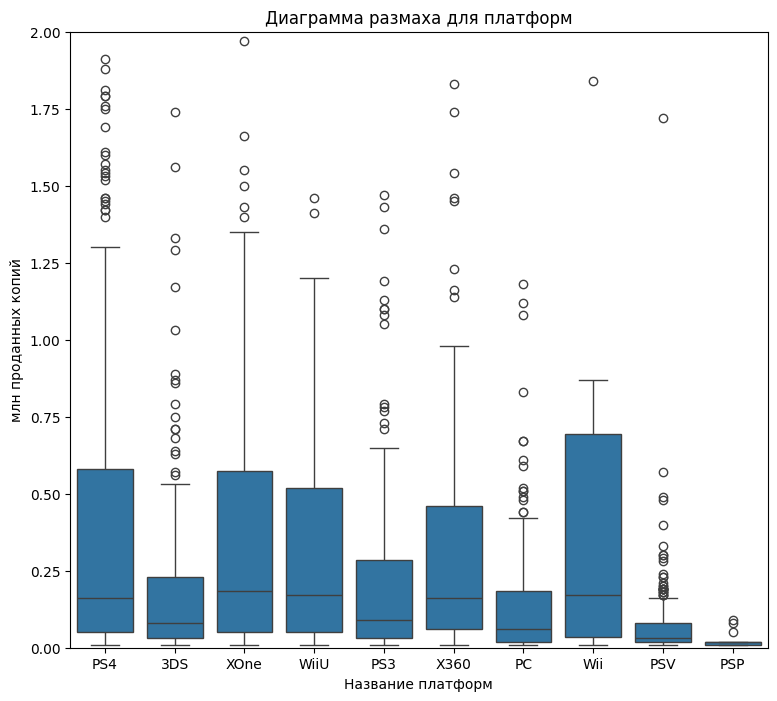

In [159]:
plt.figure(figsize=(9,8))
sns.boxplot(data = period_data, x = 'platform', y = 'total_sales')
plt.title('Диаграмма размаха для платформ')
plt.ylabel('млн проданных копий')
plt.xlabel('Название платформ')
plt.ylim((0,2))
plt.show()

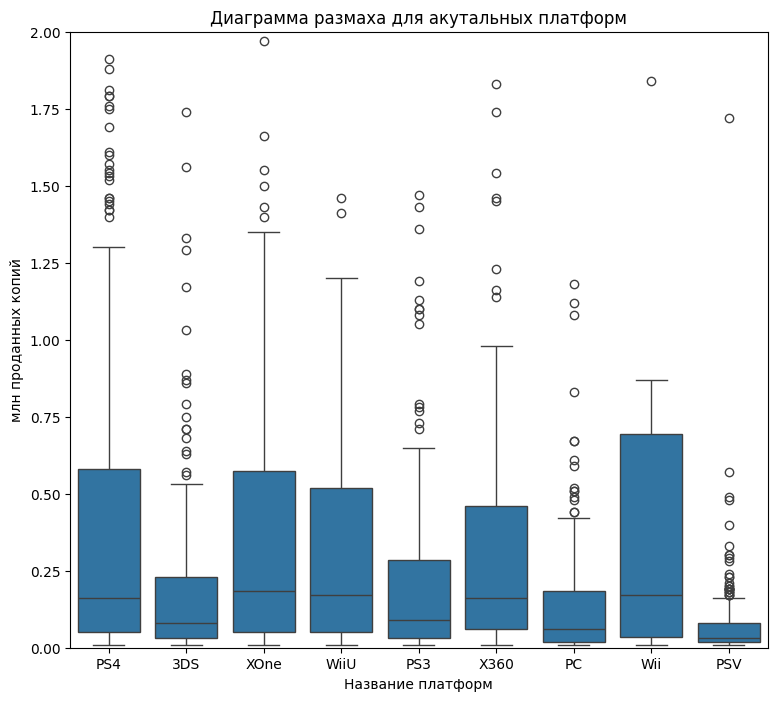

In [160]:
plt.figure(figsize=(9,8))
sns.boxplot(data = period_data.loc[data.platform.isin(period_values.columns)], x = 'platform', y = 'total_sales')
plt.title('Диаграмма размаха для акутальных платформ')
plt.ylabel('млн проданных копий')
plt.xlabel('Название платформ')
plt.ylim((0,2))
plt.show()

Рассмотрим диаграммы рассеяния, на них указаны распределения продаж игр на платформах. На графиках видно множество выбросов с неожиданно высокими либо низкими продажами. По границам квантилей и медиане можно сравнить платформы между собой. В лидерах такие платформы как ps4, xone, wiiu, wii

##### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы

In [161]:
top_platforms = period_data.groupby('platform').total_sales.sum().sort_values(ascending=False)[:5].index
top_platforms

Index(['PS4', 'XOne', '3DS', 'PS3', 'X360'], dtype='object', name='platform')

Коэффициент корреляции равен 0.4021203477635432


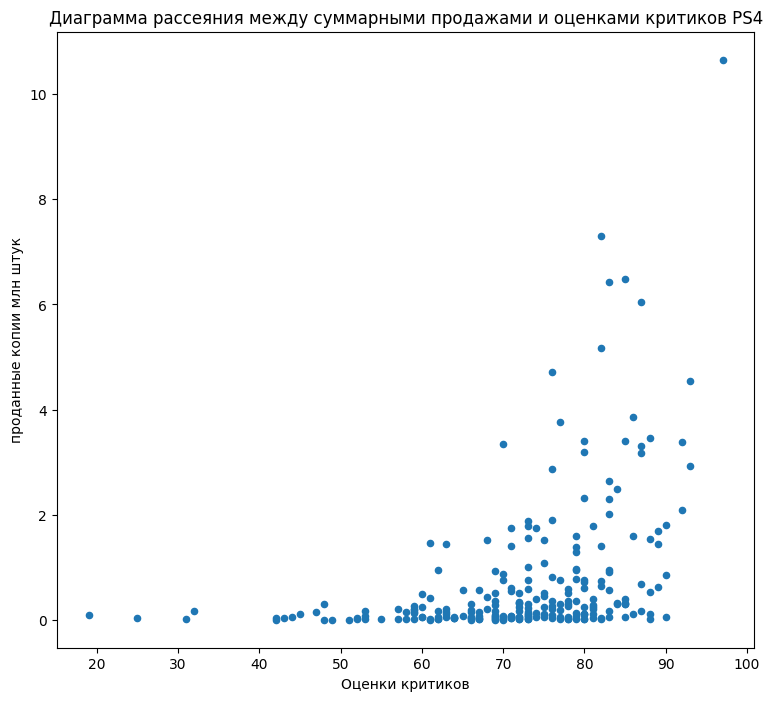

Коэффициент корреляции равен 0.4286498963779636


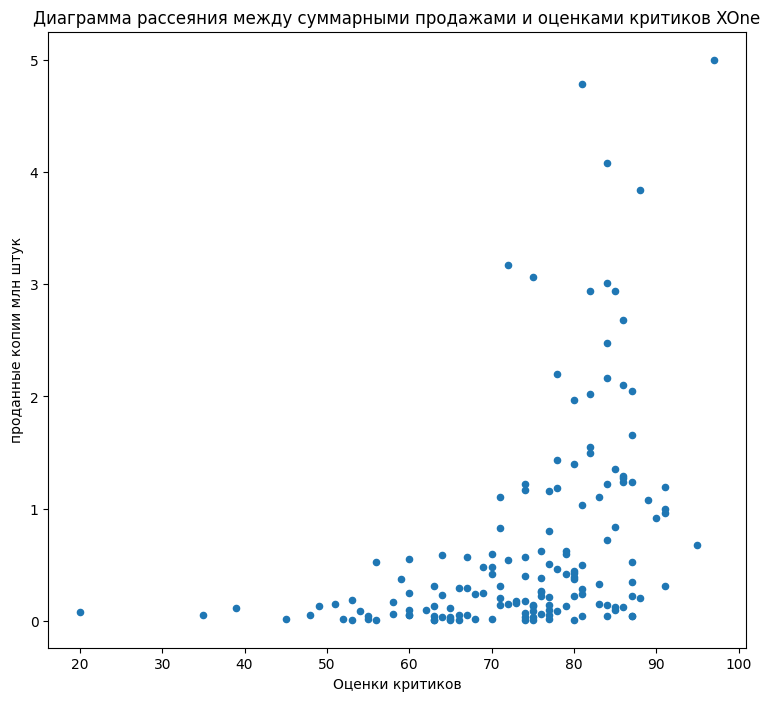

Коэффициент корреляции равен 0.3117520311601232


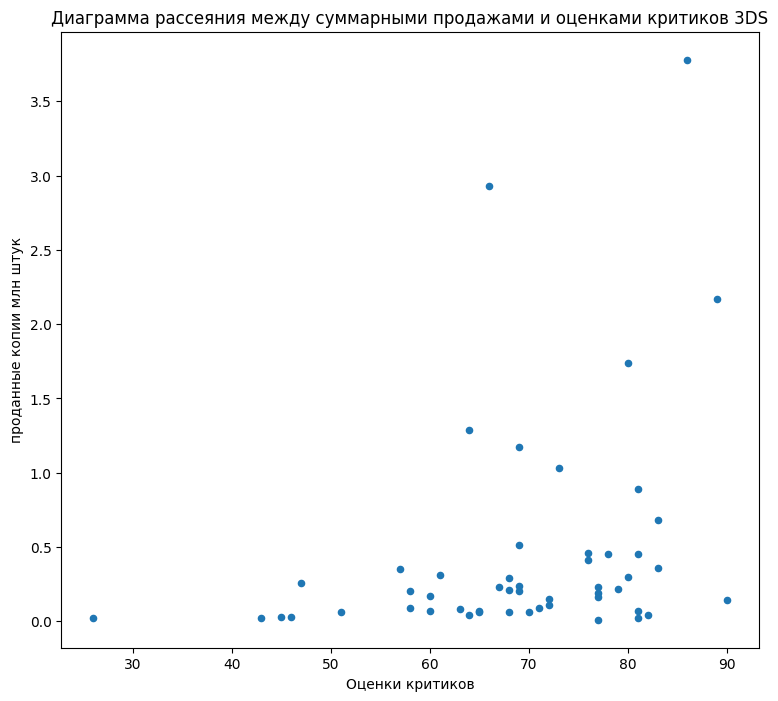

Коэффициент корреляции равен 0.4541532309291637


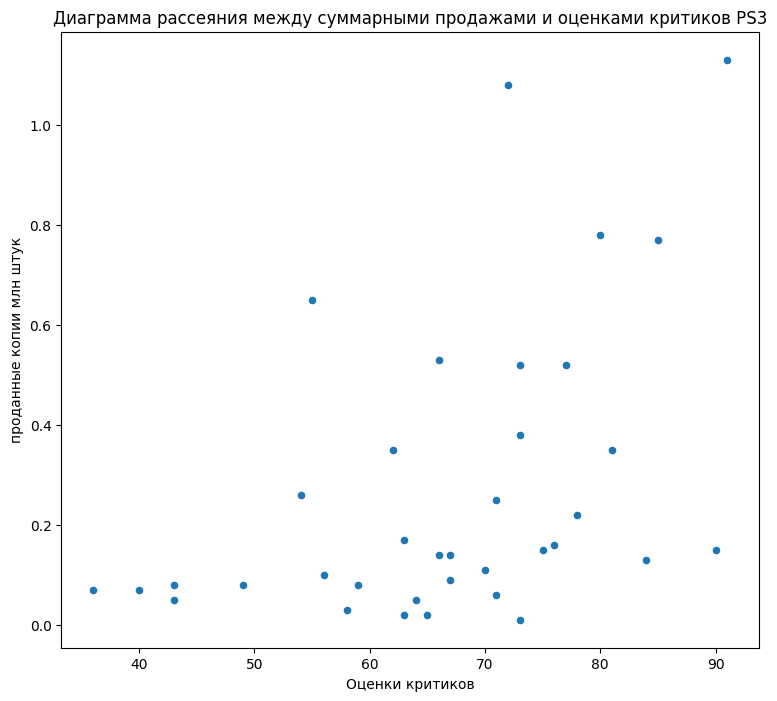

Коэффициент корреляции равен 0.5234755924945095


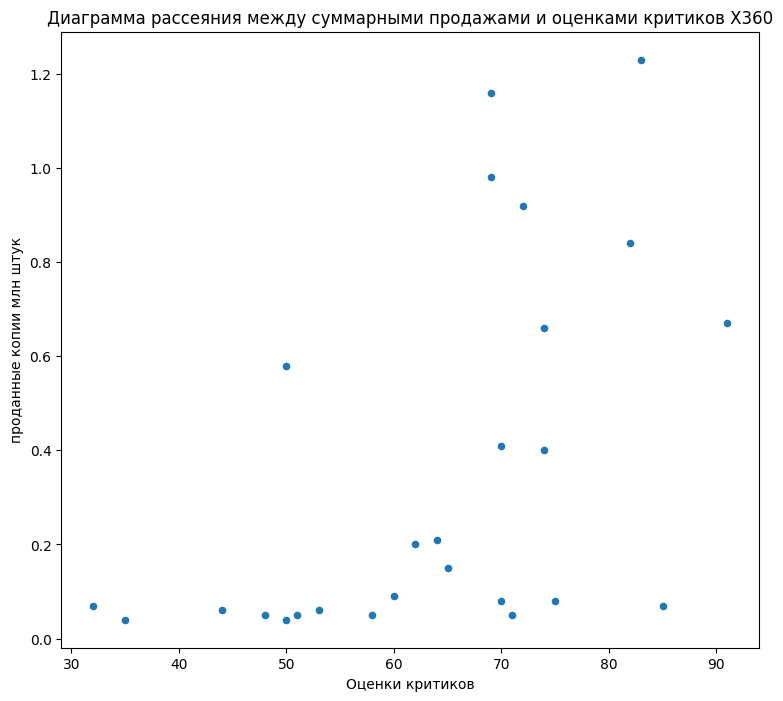

In [162]:
for platform in top_platforms:    
    popular_data = period_data.loc[period_data['platform'] == platform]
    popular_data.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(9,8))
    print('Коэффициент корреляции равен', popular_data['critic_score'].corr(popular_data['total_sales']))
    plt.title('Диаграмма рассеяния между суммарными продажами и оценками критиков' + ' ' + platform)
    plt.xlabel('Оценки критиков')
    plt.ylabel('проданные копии млн штук')
    plt.show()

Из диаграммы рассеяния между общими продажами платформы и отзывами критиков видим положительную корреляцию 0.40,
значит при увеличении балла критиков у игры также растут и общие продажи игр, однако связь ненастолько сильная,
чтобы говорить о прямой взаимосвязи этих величин

Коэффициент корреляции равен -0.13835658424281996


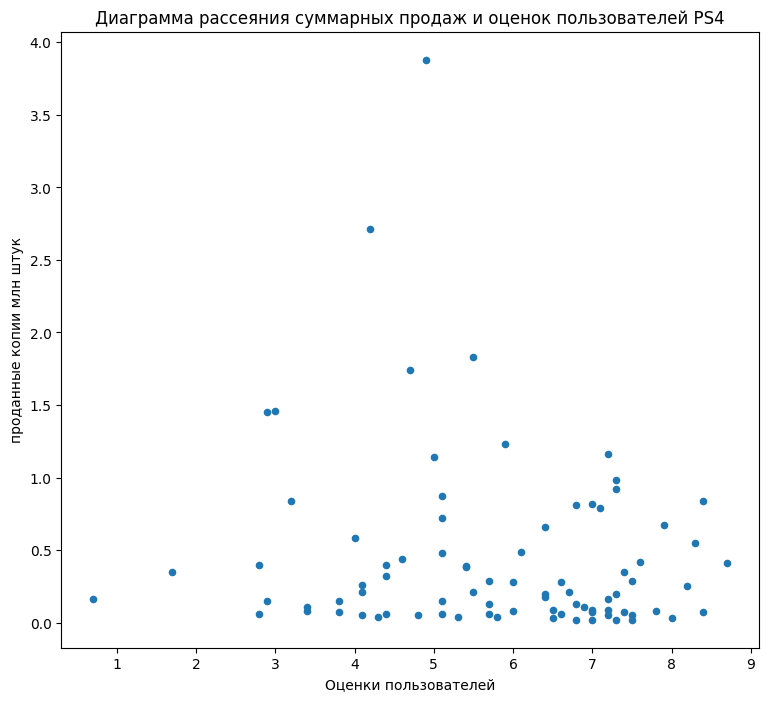

Коэффициент корреляции равен -0.13835658424281996


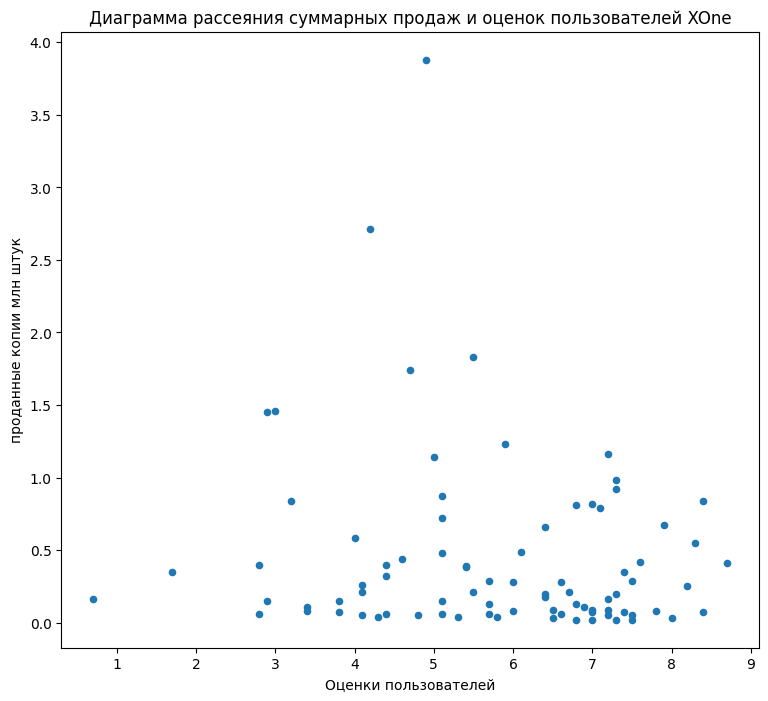

Коэффициент корреляции равен -0.13835658424281996


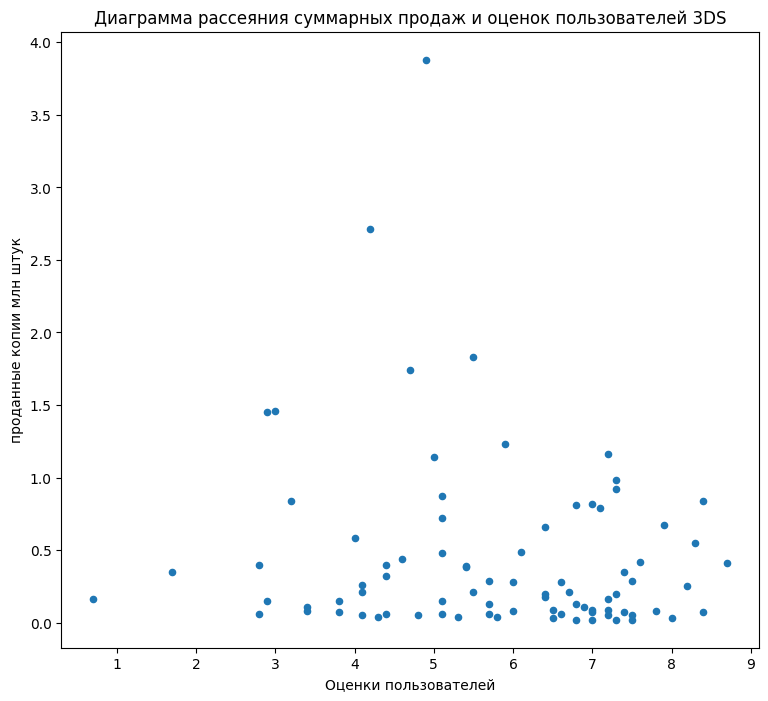

Коэффициент корреляции равен -0.13835658424281996


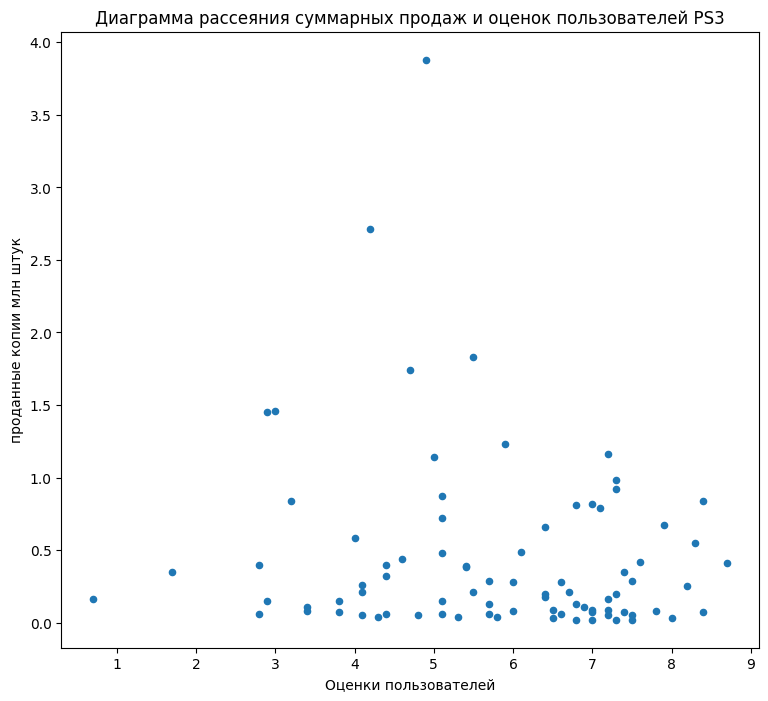

Коэффициент корреляции равен -0.13835658424281996


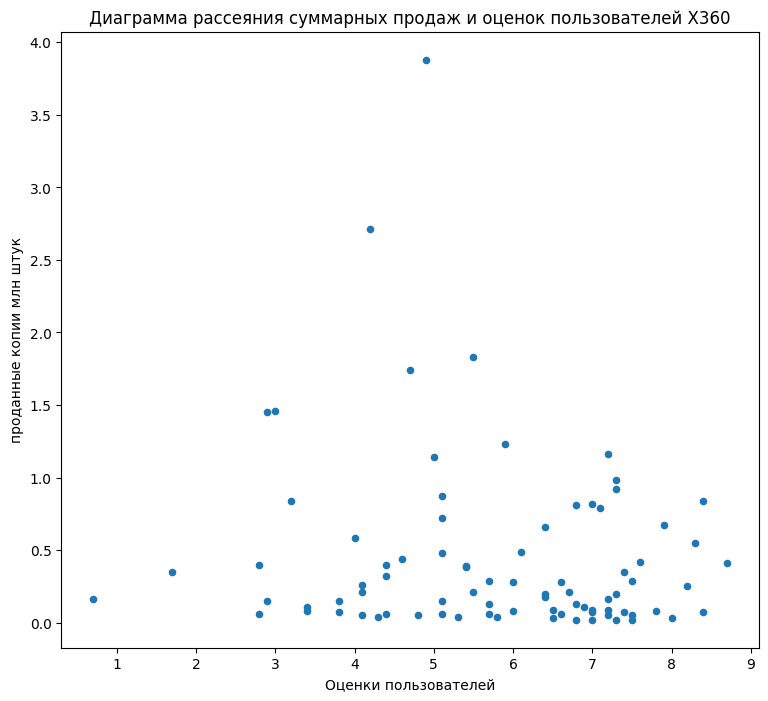

In [163]:
for platform in top_platforms:
    popular_data.plot(x='user_score', y='total_sales', kind='scatter', figsize=(9,8))
    print('Коэффициент корреляции равен', popular_data['user_score'].corr(popular_data['total_sales']))
    plt.title('Диаграмма рассеяния суммарных продаж и оценок пользователей' + ' ' + platform)
    plt.xlabel('Оценки пользователей')
    plt.ylabel('проданные копии млн штук')
    plt.show()

Из диаграммы рассеяния между общими продажами платформы и оценками игроков наблюдаем коффициент корреляции -0.03. Коэффициент корреляции хоть и отрицательный, но близок к нулю, поэтому как таковой связи между данными мы наблюдать не можем.

##### Соотнесите выводы с продажами игр на других платформах

Посмотрим верно ли что все платформы имеют такую взаимосвязь данных как изученная ранее платформа

In [164]:
scores_corr_data = (
    period_data
    .groupby('platform')[['total_sales', 'critic_score','user_score']]
    .corr().dropna()
    .iloc[::3,1:3]
)
display(scores_corr_data)
scores_corr_data.describe()

,,critic_score,user_score
platform,,,
3DS,total_sales,0.311752,0.214616
PC,total_sales,0.173823,-0.071152
PS3,total_sales,0.454153,-0.159172
PS4,total_sales,0.402120,-0.039364
PSV,total_sales,0.051543,-0.126633
WiiU,total_sales,0.369337,0.407311
X360,total_sales,0.523476,-0.138357
XOne,total_sales,0.428650,-0.070393


,critic_score,user_score
count,8.000000,8.000000
mean,0.339357,0.002107
std,0.156246,0.201426
min,0.051543,-0.159172
25%,0.277270,-0.129564
50%,0.385729,-0.070772
75%,0.435026,0.024131
max,0.523476,0.407311


Проанализировав коэффициенты корреляции платформ, сделаем вывод о том, что в среднем коэффициент корреляции между оценками критиков и продажами составляет 0.38, а для оценок игроков -0.07. Величина корреляции оценок критиков и общих продаж положительна, но не обладает достаточной величиной положительной корреляции, меньше 0.5. Видно, что у оценок критиков есть влияения на суммарные продажи платформ. Оценки игроков в свою очередь практически не влияют на общие продажи платформ так как их корреляция с продажами около 0, то есть отсутсвует достаточная как положительная так и отрицательная связь.

##### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

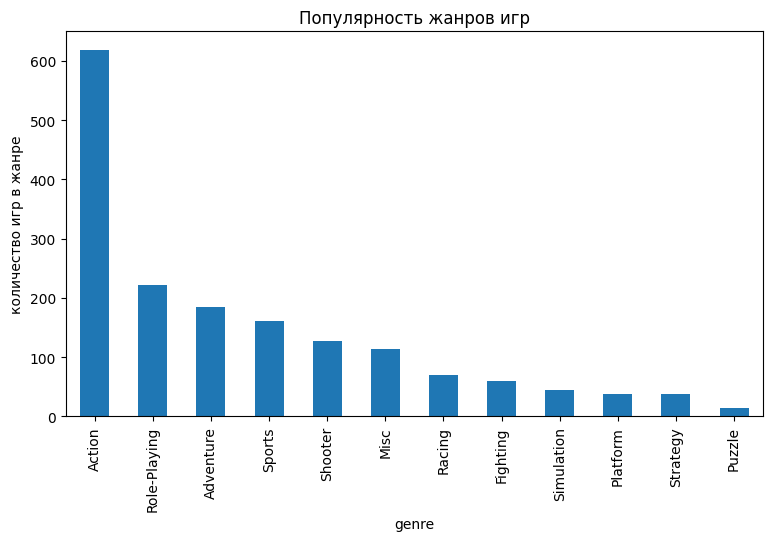

In [165]:
period_data.genre.value_counts().plot(kind='bar', figsize=(9,5))
plt.title('Популярность жанров игр')
plt.ylabel('количество игр в жанре')
plt.show()

Самыми популярными жанрами игр являются игры жанра экшн более 600 игр, затем идут жанры типа рпг чуть больше 200 игр и жанр приключение, примерно 200 игр. Самыми непопулярным жанром являются пазлы Проверим популярны ли такие же жанры в зависимости от совокупной выручки.

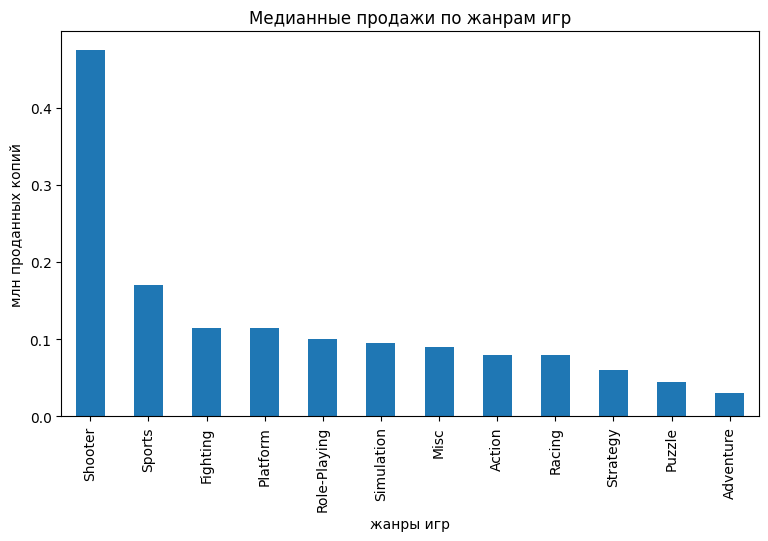

In [166]:
(
    period_data
    .groupby('genre').total_sales.median()
    .sort_values(ascending=False).plot(kind='bar', figsize=(9,5))
)
plt.title('Медианные продажи по жанрам игр')
plt.ylabel('млн проданных копий')
plt.xlabel('жанры игр')
plt.show()

Для обзора прибыльности жанров возьмем медианные значения, чтобы избежать выбросов в значениях
На первом месте по количеству проданных копий идет жанр шутер 0,5 млн проданных копий в медиане по жанру. На втором месте идут игры жанра спорт, более 0.3 млн проданных копий. На последнем месте игры жанра приключение.
То есть, игры жанра шутер и спорт хоть и не самые популярные в плане выпуска, однако зарабатывают больше других жанров

#### Составьте портрет пользователя каждого региона

##### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [167]:
def plotting(sale):
    x = df[sale].sort_values(ascending=False)
    new_row = pd.Series(data = {'others' : x[5:].sum()}, index=['others'])
    x = x[:5].append(new_row)
    plt.figure(figsize=(9,8))
    plt.pie(x=x, labels=x.index, autopct='%1.2f%%')
    plt.legend()
    plt.title(f'Самые популярные  {df.index.name} топ-5 {sale}')
    plt.ylabel('проданно игр на платформе млн шт')
    plt.grid()
    plt.show()
    return None


In [168]:
df = period_data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

Рассмотрим 5 самых популярных платформ по регионам:

* для рынка na популярностью пользуется консоли ps4 (34.71%) и Xone (28.61%) вместе занимают более 50% суммарных продаж
* в рынке eu ps4 (48.04%) занимает доминирующие место по всему региону, на втором месте XOne (17%)
* рынок jp сильнее всего отличается от западных регионов, там преобладают преймущественно японские платформы 3ds (47%) и семейство платформ Ps

##### Самые популярные жанры (топ-5). Поясните разницу

In [169]:
df = period_data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

Из графика выше сделаем вывод о самых популярных жанров по регионам продаж:

* Жанры шутер и экшн является наиболее популярным в Северной Америке, Европе.
* В Японии доминируют жанры рпг и экшн.
* Стоит отметить популярность популярность жанра экшн для всех регионов.

##### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [170]:
# Группируем данные
df = period_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

def get_platform_data(rating_name):
    """Получает данные по платформам для рейтинга"""
    games = period_data[period_data['rating'] == rating_name]
    
    platforms_data = []
    for platform, platform_games in games.groupby('platform'):
        total_sales = platform_games[['na_sales', 'eu_sales', 'jp_sales']].sum().sum()
        platforms_data.append({
            'platform': platform,
            'total_sales': total_sales
        })
    
    return pd.DataFrame(platforms_data)

# Создаем один большой график со всеми рейтингами
ratings = df.index.tolist()
n_ratings = len(ratings)

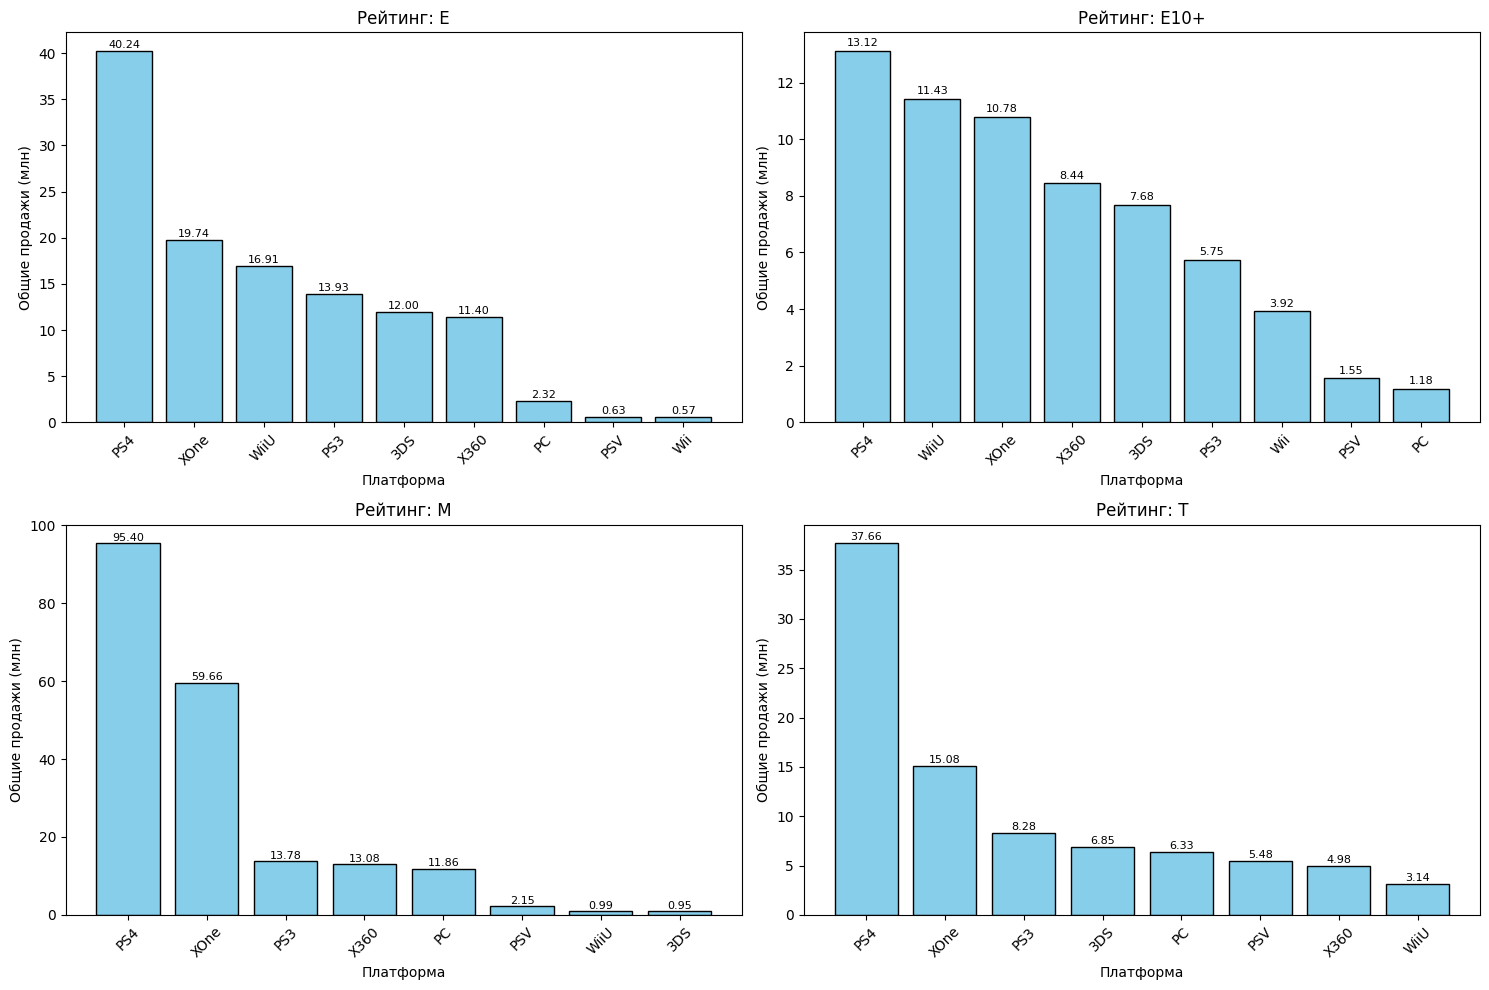

In [171]:

cols = 2
rows = (n_ratings + cols - 1) // cols  # округление вверх

fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
axes = axes.flatten()  # делаем плоский массив осей

for i, rating_name in enumerate(ratings):
    ax = axes[i]
    
    # Получаем данные
    platform_df = get_platform_data(rating_name)
    
    if not platform_df.empty:
        platform_df = platform_df.sort_values('total_sales', ascending=False)
        
        bars = ax.bar(platform_df['platform'], platform_df['total_sales'], 
                     color='skyblue', edgecolor='black')
        
        ax.set_title(f'Рейтинг: {rating_name}')
        ax.set_xlabel('Платформа')
        ax.set_ylabel('Общие продажи (млн)')
        ax.tick_params(axis='x', rotation=45)
        
        # Добавляем значения
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{height:.2f}', ha='center', va='bottom', fontsize=8)
    else:
        ax.text(0.5, 0.5, f'Нет данных\nдля рейтинга {rating_name}', 
               ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'Рейтинг: {rating_name}')

# Скрываем пустые оси, если они есть
for i in range(len(ratings), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

Сделаем выводы о рейтингах в регионах:

* На западе большее всего игр с жанром M примерно (43%) и жанр E чуть больше (24%)
* В датафрейме много пропущенных данных, которые могут исказить вывод о данных
* В японском регионе жанр T занимает лидирущее значение при продажах игр

Сделаем вывод о типичном потребителе в разных регионах

Для игроков из Северной Америки и Европы характерно предпочтение в консолях типа XOne либо PS4. Из игр предпочитает жанры экшн и шутер. Играет в игры жанра M и E.

Для японского игрока более предпочтительны платформы орентированые на внутренний рынок, либо которые были выпущены японцами: 3DS и консоли PS. Из жанров предпочитает рпг и экшн. Также из-за особенностей менталитета в стране не пользуются игры с особой жесткостью, этим объяснятся непопулярность жанра шутер и популярность игр с рейтингов T и E

#### Проверьте гипотезы

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0 Пользовательские рейтинги платформ Xbox One и PC одинаковые


H1 Пользовательские рейтинги платформ Xbox One и PC не равны

In [172]:
alpha = 0.05
results = st.ttest_ind(period_data.loc[period_data['platform'] == 'XOne'].user_score,
                       period_data.loc[period_data['platform'] == 'PC'].user_score, nan_policy='omit')


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
display(results.pvalue)

Не получилось отвергнуть нулевую гипотезу


0.10450507919348416

После проведенного теста не сможем отвергнем гипотезу о равенстве средних пользовательских рейтингов платформ XOne и PC

##### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0 Средние пользовательские рейтинги жанров Action и Sports одинаковые

H1 Средние пользовательские рейтинги жанров Action и Sports разные

In [173]:
alpha = 0.05
results = st.ttest_ind(period_data.loc[period_data['genre'] == 'Action'].user_score,
                       period_data.loc[period_data['genre'] == 'Sports'].user_score, nan_policy='omit')


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
display(results.pvalue)

Отвергаем нулевую гипотезу


2.8711147985105864e-19

Проведя эксперимент можем сделать вывод, что разница пользовательских оценок игроков жанров action и sport является статистически значимой. Так что мы не можем опровергнуть нулевую гипотезу

#### Напишите общий вывод

Целью выполнения работы являлись выводы, полученные в ходе анализа данных о видео играх.

Исходя из проведенного анализа мы сформулировали следующие предложения:
1) Исследовательский анализ данных
* До 1994 года игровая индустрия не была такой развитой
* С 1994 года игровая индустрия испытывала подъем, который закончился в 2009 году и продолжает снижатся до 2016 года
* Оказалось, что игровые платформы имеют жизненные циклы, на смену старому поколению приходит новое
* В среднем циклы устройств длятся 7.5 лет
* Нашли актуальный период который используем для анализа 2013-2016 года, в 2013 году вышло новое поколение платформ
* Выявили популярнейшие платформы за актуальный период и их динамику. Наиболее актуальные платформы: PS4, XOne, 3DS лидеры, доля остальных платфом незначительна
* Сделали вывод о влиянии оценок критиков и игроков на продажи игр. Для оценок критиков наблюдаем 0.35 коэффициент корреляции, а для оценок игроков около 0. В целом хоть связь и является положительной, но нельзя говорить, что оценки критиков сильно коррелируют с продажами игр.
* Выделили самые популярные жанры по количеству выпускаемых игр: Action, RPG, Adventure. Однако по проданным копиям игр игры жанра Shooter наиболее прибыльные из жанров

2) Портрет пользователя по каждому региону
* Приорететные платформы для западных игроков и японских разные. Европейские и Американские игроки предпочитают консоли: Xboxone и Ps4. Консоли предназначенные для глобального рынка, тогда как Японцы предпочитают консоли компании Nintendo, которые заточены на их внутренный спрос.
* Жанр который одинаково популярны как у запада, так и у азии, например: action. Так западные игроки предпочитают игры жанра shooter, а японцы игры жанра рпг.
* В датафрейме много пропущенных данных, которые могут исказить вывод о данных. Из представленных выше данных видим, что рейтинг ERSB влияет на продажи копий игр. Наиболее популярные игры для запада с рейтингом M (для взрослых), далее идут игры с рейтингом E (для всех). В японском регионе отдают предпочтение играм с рейтингом T (для подростков) и E, поскольку у них ненастолько популярны игр с жестокостью

3) Проверка гипотез
* Не смогли опровегнуть гипотезу о равенстве пользовательских оценок для платформ XOne и PC
* Смогли опровергнуть гипотезу о равенстве пользовательских рейтингов жанров Action и Sport